# LeView

The first step is to read the dataset and choose an activation function. We'll use a sigmoid.

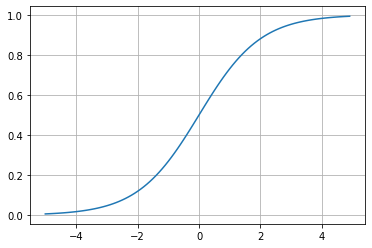

In [45]:
from mnist import MNIST
import numpy as np
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

mndata = MNIST("Dataset")
images, label = mndata.load_training()


sigma = lambda x: 1/(1+np.exp(-x))

epsilon = lambda a, b: (a-b)**2 # Error function

X = np.arange(-5, 5, 0.1)
Y = sigma(X)

plt.plot(X, Y)
plt.grid()
plt.show()

In [106]:
class neural_net:
    
    def __init__(self, structure):
        '''
        
        structure: [input_dimension, hl_1_dimension, ..., hl_n_dimension, out_dimension]
        
        
        '''
        self.structure = structure
        self.weights = [np.random.rand(structure[i+1], structure[i]) for i in range(0, len(structure)-1)]
        self.biases = [np.random.rand(structure[i]) for i in range(1, len(structure))]
        
    def compute(self, input_data):
        
        s = self.structure     
        W = self.weights
        B = self.biases
        
        for L in range(0, len(s)-1): # For each layer
                        
            out = sigma(W[L].dot(input_data)+B[L])
            input_data = out
              
        return input_data
    
    
    def train(self, data, label):
        
        error = None
        gradError = None
        for i in range(len(data)):
            stake = self.compute(data[i])
            error = epsilon(stake, label[i])
            gradError = np.gradient(-error) # We need to decrease the value of this function, thus going on the opposite of the gradient.
            
            
            
        
        print("Error = ", error[0])
        print("-GradE = ", gradError[0])


Training algorithm implementation tests: with input [x, y], output is [-x, -y]

In [105]:
def f(a):
    return (-a[0], -a[1])

perceptron = neural_net([2, 2])

data = [(np.random.randint(-100, 100, size=2)) for i in range(2)]
label = [f(data) for i in range(len(data))]

perceptron.train(data, label)

Error =  [2116.         1155.99652537]
-GradE =  [[1275.          66.9998978]
 [1275.          66.9998978]]
